<a href="https://colab.research.google.com/github/putriayualc/PCVK_Ganjil_2024/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

from google.colab.patches import cv2_imshow

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


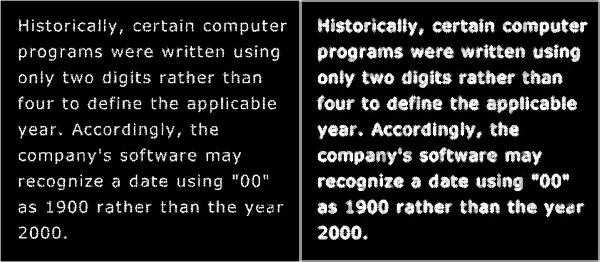

In [4]:
# Membaca citra masukan
img = cv2.imread('/content/drive/MyDrive/PCVK/img/morphology.png', 0)  # Menggunakan grayscale untuk proses dilasi

# Fungsi dilasi dengan SED berbentuk cross 3x3
def dilasi(image):
    # Mendefinisikan structuring element berbentuk cross 3x3
    SED = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], dtype=np.uint8)

    # Mendapatkan ukuran citra dan padding untuk konvolusi
    pad = 1  # Padding untuk ukuran SED 3x3
    image_padded = np.pad(image, pad, mode='constant', constant_values=0)
    output = np.zeros_like(image)

    # Iterasi pada setiap piksel citra
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            # Mengambil area sesuai ukuran SED
            region = image_padded[y:y + 3, x:x + 3]
            # Melakukan operasi dilasi (max filter) menggunakan SED cross
            output[y, x] = np.max(region[SED == 1])

    return output

# Melakukan dilasi pada citra
dilated_image = dilasi(img)

# Menggabungkan citra awal dan citra hasil dilasi secara horizontal
concatenated_image = cv2.hconcat([img, dilated_image])

# Menampilkan hasil gabungan
cv2_imshow(concatenated_image)


[[0 1 0]
 [1 1 1]
 [0 1 0]]


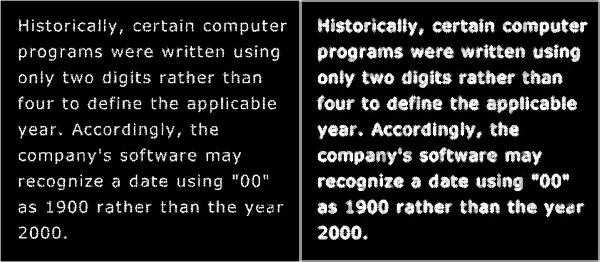

In [5]:
#soal 4
# Membaca citra masukan
image = cv2.imread('/content/drive/MyDrive/PCVK/img/morphology.png', 0)  # Menggunakan grayscale

# Membuat Structuring Element berbentuk cross 3x3
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
print(kernel)

# Melakukan operasi dilasi pada citra
dilated_image = cv2.dilate(image, kernel, iterations=1)

# Menampilkan citra awal dan hasil dilasi secara berdampingan
concatenated_image = cv2.hconcat([image, dilated_image])
cv2_imshow(concatenated_image)


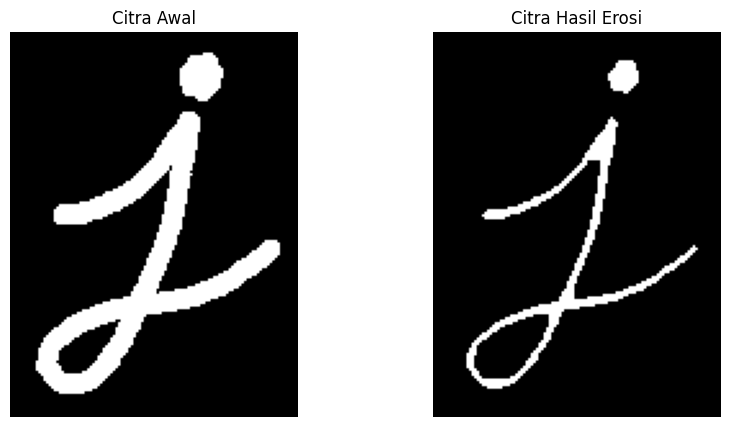

In [6]:
# Soal 5
# Fungsi untuk melakukan operasi erosi secara manual
def erosi_manual(image, struct_elem):
    # Mendapatkan ukuran citra dan structuring element (SE)
    rows, cols = image.shape
    se_rows, se_cols = struct_elem.shape
    pad_x, pad_y = se_cols // 2, se_rows // 2

    # Membuat citra hasil erosi dengan ukuran yang sama
    eroded_image = np.zeros((rows, cols), dtype=np.uint8)

    # Iterasi pada piksel citra (menghindari area pad)
    for i in range(pad_x, rows - pad_x):
        for j in range(pad_y, cols - pad_y):
            # Mengambil sub-citra yang sesuai dengan ukuran SE
            sub_img = image[i - pad_x:i + pad_x + 1, j - pad_y:j + pad_y + 1]

            # Cek apakah semua nilai sub-citra sama dengan 255 (putih)
            if np.all(sub_img == 255):
                eroded_image[i, j] = 255

    return eroded_image

# Membaca citra dalam mode grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/img/j.png', cv2.IMREAD_GRAYSCALE)

# Validasi apakah citra berhasil dibaca
if image is None:
    print("Error: Gambar tidak ditemukan!")
else:
    # Binarisasi citra menggunakan thresholding
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Membuat structuring element berbentuk square 5x5
    struct_elem = np.ones((5, 5), dtype=np.uint8)

    # Melakukan operasi erosi pada citra
    eroded_image = erosi_manual(binary_image, struct_elem)

    # Menampilkan citra asli dan hasil erosi
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(eroded_image, cmap='gray')
    plt.title('Citra Hasil Erosi')
    plt.axis('off')

    plt.show()


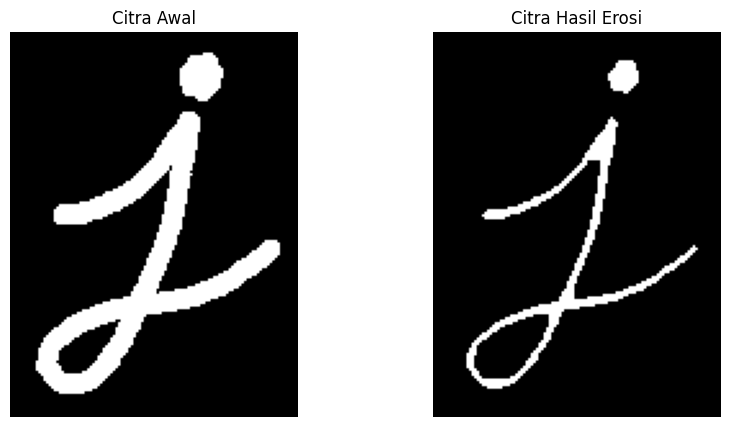

In [7]:
# Soal 6
# Membaca citra dalam mode grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/img/j.png', cv2.IMREAD_GRAYSCALE)

# Validasi apakah citra berhasil dibaca
if image is None:
    print("Error: Gambar tidak ditemukan!")
else:
    # Membuat Structuring Element (SE) berbentuk square 5x5
    struct_elem = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

    # Melakukan operasi erosi pada citra menggunakan SE
    eroded_image = cv2.erode(image, struct_elem)

    # Menampilkan citra asli dan hasil erosi
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Citra Awal')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(eroded_image, cmap='gray')
    plt.title('Citra Hasil Erosi')
    plt.axis('off')

    plt.show()


Menggunakan Library

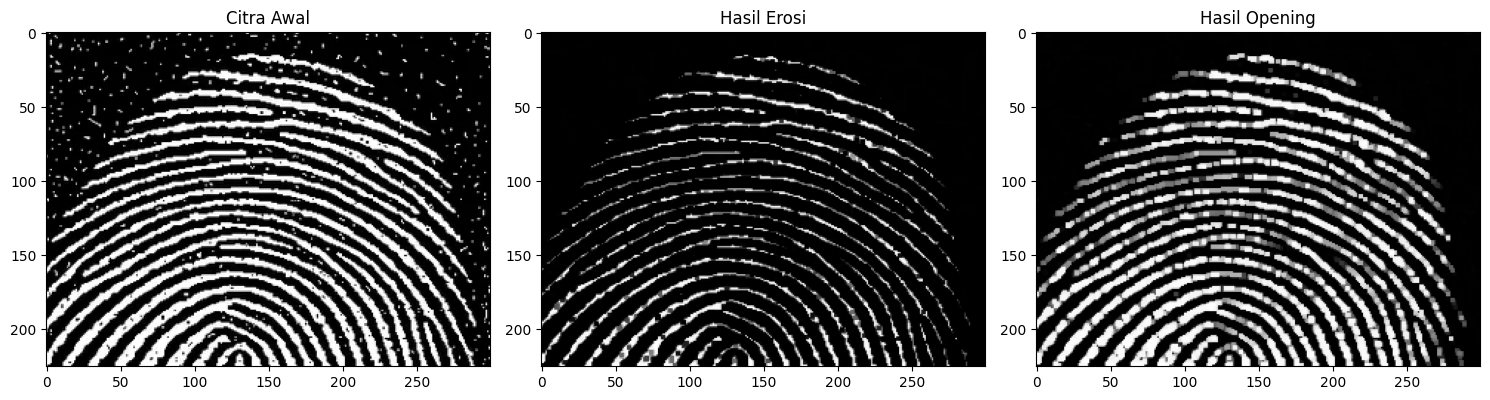

In [12]:
# Soal 7
# Membaca citra dalam mode grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/img/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Membuat elemen struktural berbentuk persegi dengan ukuran 3x3
struct_elem = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Melakukan erosi pada citra
eroded_image = cv2.erode(image, struct_elem)

# Melakukan operasi opening (erosi diikuti dengan dilasi)
opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, struct_elem)

# Menampilkan citra awal, hasil erosi, dan hasil opening
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('on')

plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Hasil Erosi')
plt.axis('on')

plt.subplot(1, 3, 3)
plt.imshow(opened_image, cmap='gray')
plt.title('Hasil Opening')
plt.axis('on')

plt.tight_layout()
plt.show()

Tanpa library

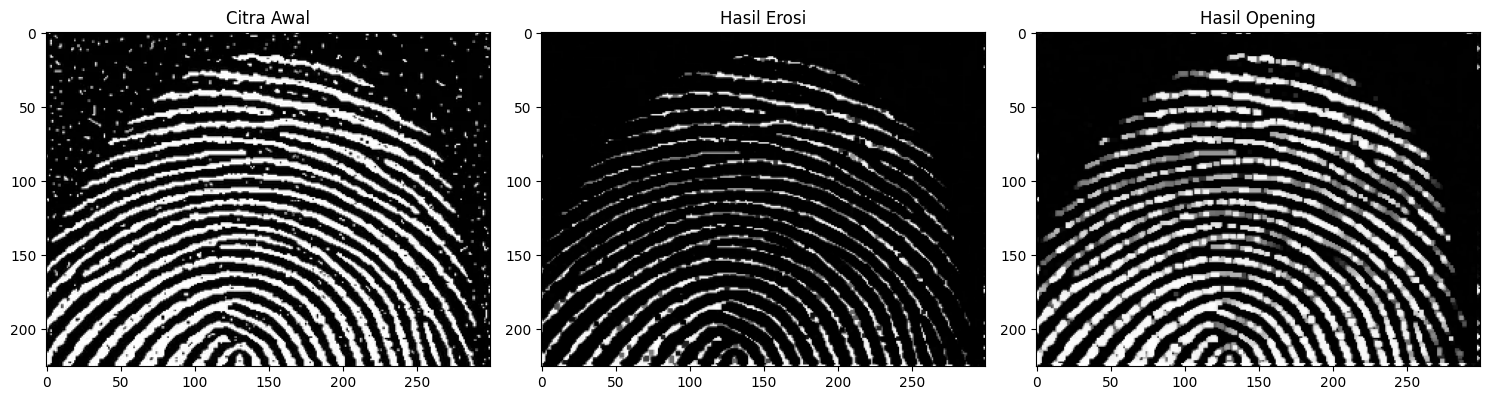

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Membaca citra dalam mode grayscale
image = Image.open('/content/drive/MyDrive/PCVK/img/fingerprint.png').convert('L')
image = np.array(image)

# Membuat elemen struktural berbentuk persegi dengan ukuran 3x3
struct_elem = np.ones((3, 3), dtype=np.uint8)

# Fungsi untuk melakukan erosi manual
def erosi_manual(image, struct_elem):
    rows, cols = image.shape
    eroded_image = np.copy(image)
    se_rows, se_cols = struct_elem.shape
    pad_x, pad_y = se_cols // 2, se_rows // 2

    for i in range(pad_x, rows - pad_x):
        for j in range(pad_y, cols - pad_y):
            sub_img = image[i - pad_x:i + pad_x + 1, j - pad_y:j + pad_y + 1]
            if np.all(sub_img[struct_elem == 1] == 255):
                eroded_image[i, j] = 255
            else:
                eroded_image[i, j] = np.min(sub_img[struct_elem == 1])  # Menyesuaikan nilai minimum
    return eroded_image

# Fungsi untuk melakukan dilasi manual
def dilasi_manual(image, struct_elem):
    rows, cols = image.shape
    dilated_image = np.copy(image)
    se_rows, se_cols = struct_elem.shape
    pad_x, pad_y = se_cols // 2, se_rows // 2

    for i in range(pad_x, rows - pad_x):
        for j in range(pad_y, cols - pad_y):
            sub_img = image[i - pad_x:i + pad_x + 1, j - pad_y:j + pad_y + 1]
            if np.any(sub_img[struct_elem == 1] == 255):
                dilated_image[i, j] = 255
            else:
                dilated_image[i, j] = np.max(sub_img[struct_elem == 1])  # Menyesuaikan nilai maksimum
    return dilated_image

# Melakukan erosi pada citra
eroded_image = erosi_manual(image, struct_elem)

# Melakukan operasi opening (erosi diikuti dengan dilasi)
opened_image = dilasi_manual(eroded_image, struct_elem)

# Menampilkan citra awal, hasil erosi, dan hasil opening
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('on')

plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Hasil Erosi')
plt.axis('on')

plt.subplot(1, 3, 3)
plt.imshow(opened_image, cmap='gray')
plt.title('Hasil Opening')
plt.axis('on')

plt.tight_layout()
plt.show()


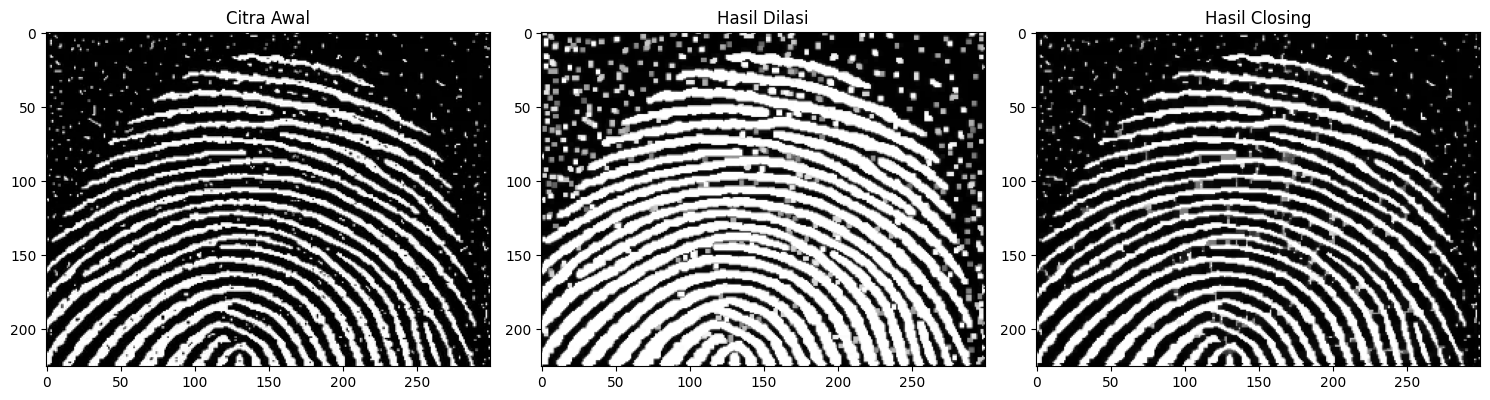

In [15]:
# Soal 8

# Membaca citra dalam mode grayscale
image = Image.open('/content/drive/MyDrive/PCVK/img/fingerprint.png').convert('L')
image = np.array(image)

# Membuat elemen struktural berbentuk persegi dengan ukuran 3x3
struct_elem = np.ones((3, 3), dtype=np.uint8)

# Langkah 1: Dilasi
dilated_image = dilasi_manual(image, struct_elem)

# Langkah 2: Erosi pada hasil dilasi
closed_image = erosi_manual(dilated_image, struct_elem)

# Menampilkan citra awal, hasil dilasi, dan hasil closing
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('on')

plt.subplot(1, 3, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Hasil Dilasi')
plt.axis('on')

plt.subplot(1, 3, 3)
plt.imshow(closed_image, cmap='gray')
plt.title('Hasil Closing')
plt.axis('on')

plt.tight_layout()
plt.show()


Menggunakan Library

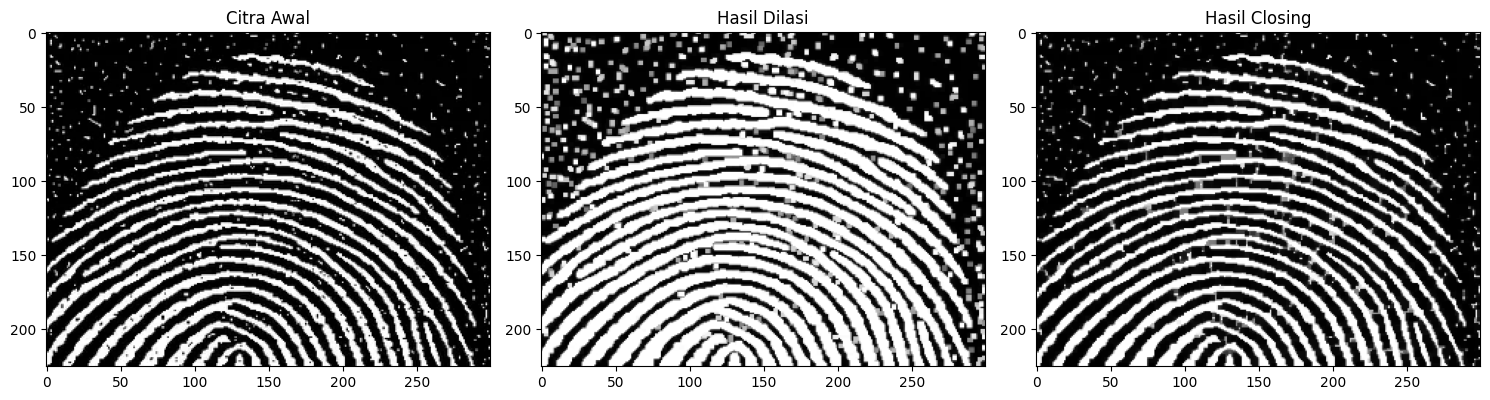

In [17]:
# Membaca citra dalam mode grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/img/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Membuat elemen struktural berbentuk persegi dengan ukuran 3x3
struct_elem = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Melakukan dilasi pada citra
dilated_image = cv2.dilate(image, struct_elem)

# Melakukan operasi closing (dilasi diikuti dengan erosi)
closed_image = cv2.erode(dilated_image, struct_elem)

# Menampilkan citra awal, hasil dilasi, dan hasil closing
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('on')

plt.subplot(1, 3, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Hasil Dilasi')
plt.axis('on')

plt.subplot(1, 3, 3)
plt.imshow(closed_image, cmap='gray')
plt.title('Hasil Closing')
plt.axis('on')

plt.tight_layout()
plt.show()


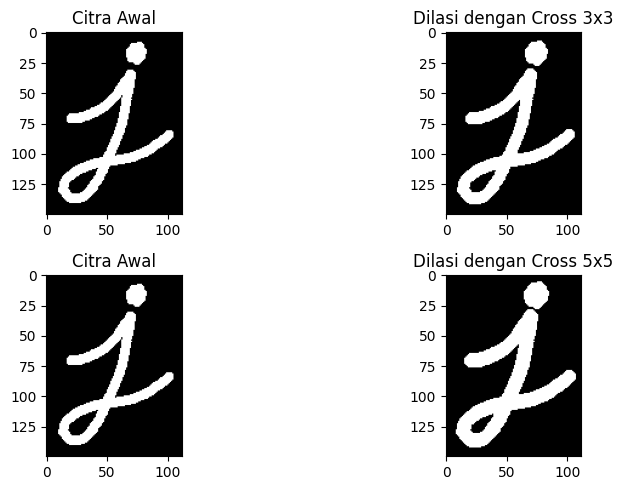

In [23]:
# Soal 9
# Membaca citra dalam mode grayscale
image = Image.open('/content/drive/MyDrive/PCVK/img/j.png').convert('L')
image = np.array(image)

# Membuat elemen struktural berbentuk cross dengan ukuran 3x3 dan 5x5
struct_elem_3x3 = np.array([[0, 1, 0],
                            [1, 1, 1],
                            [0, 1, 0]], dtype=np.uint8)

struct_elem_5x5 = np.array([[0, 0, 1, 0, 0],
                            [0, 1, 1, 1, 0],
                            [1, 1, 1, 1, 1],
                            [0, 1, 1, 1, 0],
                            [0, 0, 1, 0, 0]], dtype=np.uint8)


# Melakukan dilasi pada citra menggunakan elemen struktural 3x3 dan 5x5
dilated_image_3x3 = dilasi_manual(image, struct_elem_3x3)
dilated_image_5x5 = dilasi_manual(image, struct_elem_5x5)

# Menampilkan citra awal, hasil dilasi dengan elemen 3x3, dan hasil dilasi dengan elemen 5x5
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('on')

plt.subplot(2, 2, 2)
plt.imshow(dilated_image_3x3, cmap='gray')
plt.title('Dilasi dengan Cross 3x3')
plt.axis('on')

plt.subplot(2, 2, 3)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('on')

plt.subplot(2, 2, 4)
plt.imshow(dilated_image_5x5, cmap='gray')
plt.title('Dilasi dengan Cross 5x5')
plt.axis('on')

plt.tight_layout()
plt.show()


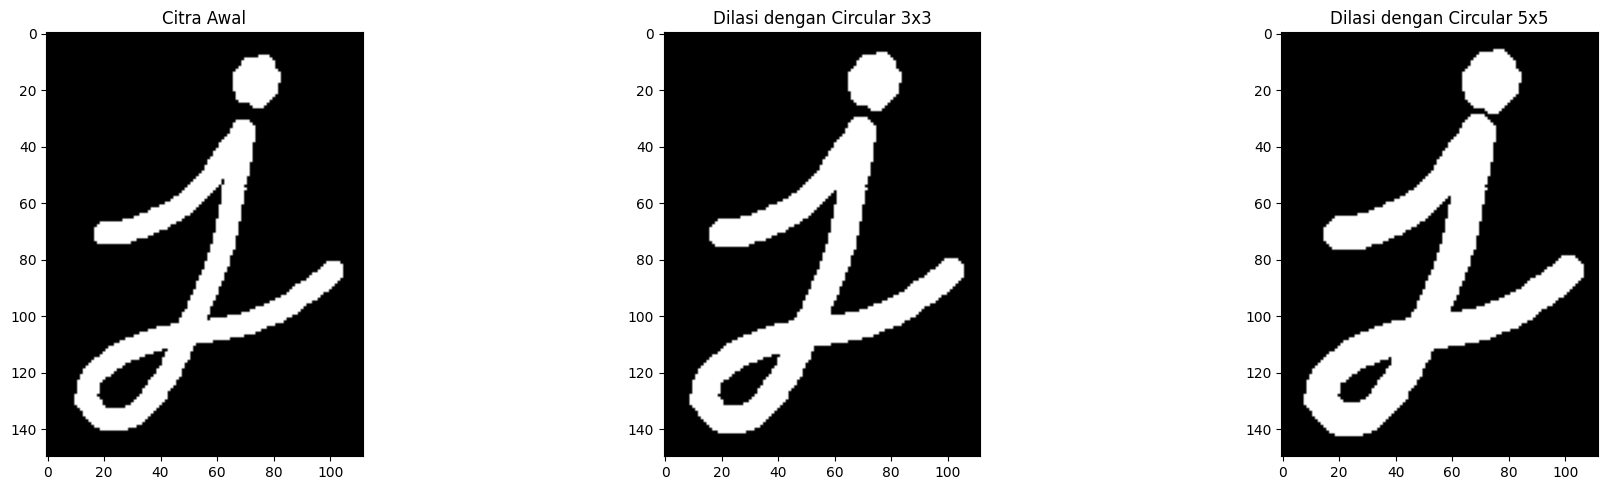

In [24]:
# Soal 10
# Membaca citra dalam mode grayscale
image = Image.open('/content/drive/MyDrive/PCVK/img/j.png').convert('L')
image = np.array(image)

# Membuat elemen struktural berbentuk lingkaran dengan ukuran 3x3 dan 5x5
struct_elem_3x3 = np.array([[0, 1, 0],
                            [1, 1, 1],
                            [0, 1, 0]], dtype=np.uint8)

struct_elem_5x5 = np.array([[0, 0, 1, 0, 0],
                            [0, 1, 1, 1, 0],
                            [1, 1, 1, 1, 1],
                            [0, 1, 1, 1, 0],
                            [0, 0, 1, 0, 0]], dtype=np.uint8)


# Melakukan dilasi pada citra menggunakan elemen struktural lingkaran 3x3 dan 5x5
dilated_image_3x3 = dilasi_manual(image, struct_elem_3x3)
dilated_image_5x5 = dilasi_manual(image, struct_elem_5x5)

# Menampilkan citra awal, hasil dilasi dengan elemen lingkaran 3x3, dan hasil dilasi dengan elemen lingkaran 5x5
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('on')

plt.subplot(1, 3, 2)
plt.imshow(dilated_image_3x3, cmap='gray')
plt.title('Dilasi dengan Circular 3x3')
plt.axis('on')

plt.subplot(1, 3, 3)
plt.imshow(dilated_image_5x5, cmap='gray')
plt.title('Dilasi dengan Circular 5x5')
plt.axis('on')

plt.tight_layout()
plt.show()


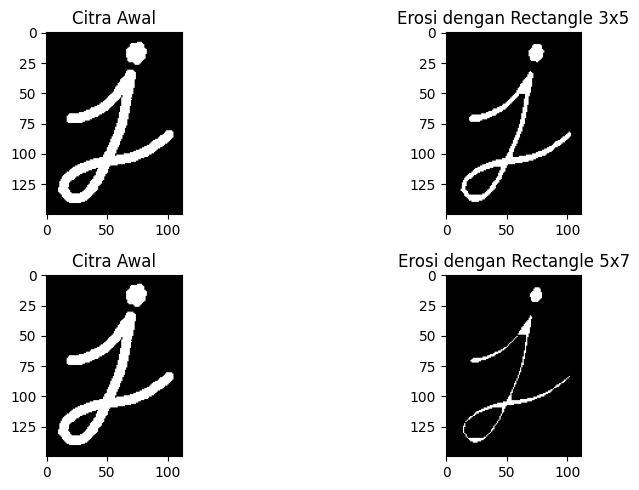

In [31]:
# Soal 11

# Membaca citra dalam mode grayscale
image = Image.open('/content/drive/MyDrive/PCVK/img/j.png').convert('L')
image = np.array(image)

# Membuat elemen struktural berbentuk rectangle dengan ukuran 3x5 dan 5x7
struct_elem_3x5 = np.ones((3, 5), dtype=np.uint8)  # 3x5 rectangle
struct_elem_5x7 = np.ones((5, 7), dtype=np.uint8)  # 5x7 rectangle

# Fungsi untuk melakukan erosi manual
def erosi_manual(image, struct_elem):
    rows, cols = image.shape
    eroded_image = np.zeros_like(image)
    se_rows, se_cols = struct_elem.shape
    pad_x, pad_y = se_rows // 2, se_cols // 2

    for i in range(pad_x, rows - pad_x):
        for j in range(pad_y, cols - pad_y):
            sub_img = image[i - pad_x:i + pad_x + 1, j - pad_y:j + pad_y + 1]
            if sub_img.shape == struct_elem.shape and np.all(sub_img[struct_elem == 1] == 255):
                eroded_image[i, j] = 255
            else:
                eroded_image[i, j] = np.min(sub_img[struct_elem == 1])
    return eroded_image

# Melakukan erosi pada citra menggunakan elemen struktural rectangle 3x5 dan 5x7
eroded_image_3x5 = erosi_manual(image, struct_elem_3x5)
eroded_image_5x7 = erosi_manual(image, struct_elem_5x7)

# Menampilkan citra awal, hasil erosi dengan elemen rectangle 3x5, dan hasil erosi dengan elemen rectangle 5x7
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('on')

plt.subplot(2, 2, 2)
plt.imshow(eroded_image_3x5, cmap='gray')
plt.title('Erosi dengan Rectangle 3x5')
plt.axis('on')

plt.subplot(2, 2, 3)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('on')

plt.subplot(2, 2, 4)
plt.imshow(eroded_image_5x7, cmap='gray')
plt.title('Erosi dengan Rectangle 5x7')
plt.axis('on')

plt.tight_layout()
plt.show()


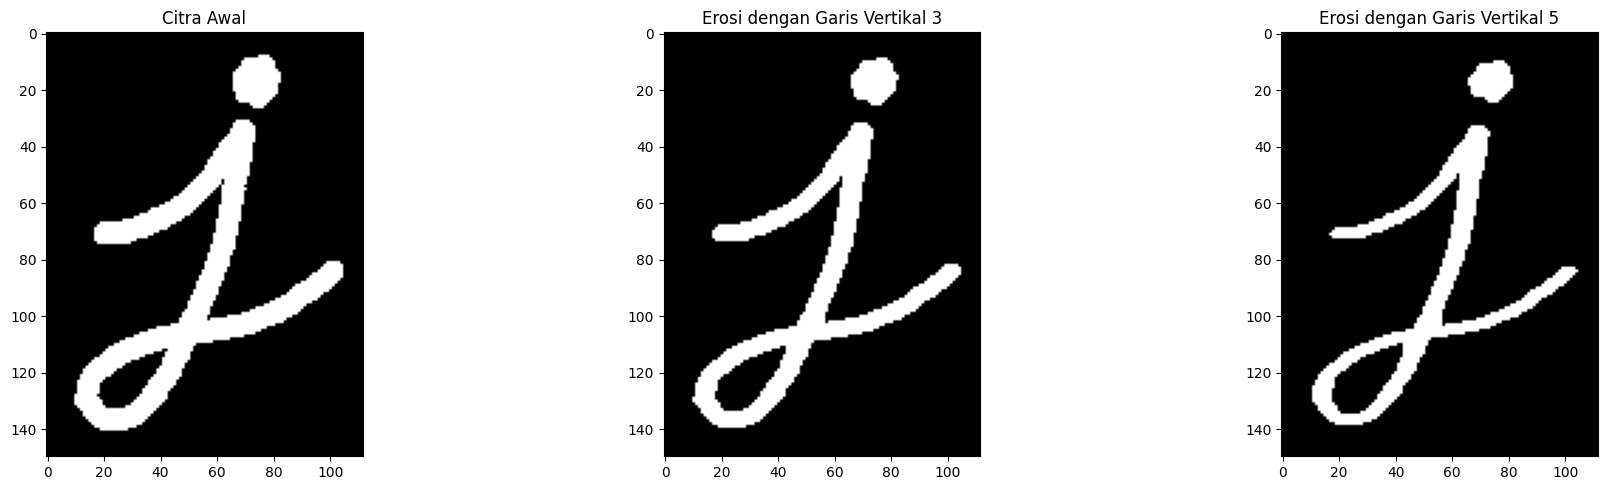

In [33]:
# soal 12

# Membaca citra dalam mode grayscale
image = Image.open('/content/drive/MyDrive/PCVK/img/j.png').convert('L')
image = np.array(image)

# Membuat elemen struktural berbentuk garis vertikal dengan ukuran 3 dan 5
struct_elem_3 = np.array([[1], [1], [1]], dtype=np.uint8)  # 3-pixel vertical line
struct_elem_5 = np.array([[1], [1], [1], [1], [1]], dtype=np.uint8)  # 5-pixel vertical line

# Fungsi untuk melakukan erosi manual
def erosi_manual(image, struct_elem):
    rows, cols = image.shape
    eroded_image = np.zeros_like(image)
    se_rows, se_cols = struct_elem.shape
    pad_x, pad_y = se_rows // 2, se_cols // 2

    for i in range(pad_x, rows - pad_x):
        for j in range(pad_y, cols - pad_y):
            sub_img = image[i - pad_x:i + pad_x + 1, j - pad_y:j + pad_y + 1]
            # Pastikan ukuran sub_img sama dengan elemen struktural
            if sub_img.shape == struct_elem.shape and np.all(sub_img[struct_elem == 1] == 255):
                eroded_image[i, j] = 255
            else:
                eroded_image[i, j] = np.min(sub_img[struct_elem == 1])
    return eroded_image

# Melakukan erosi pada citra menggunakan elemen struktural garis vertikal 3 dan 5
eroded_image_3 = erosi_manual(image, struct_elem_3)
eroded_image_5 = erosi_manual(image, struct_elem_5)

# Menampilkan citra awal, hasil erosi dengan elemen garis vertikal 3, dan hasil erosi dengan elemen garis vertikal 5
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('on')

plt.subplot(1, 3, 2)
plt.imshow(eroded_image_3, cmap='gray')
plt.title('Erosi dengan Garis Vertikal 3')
plt.axis('on')

plt.subplot(1, 3, 3)
plt.imshow(eroded_image_5, cmap='gray')
plt.title('Erosi dengan Garis Vertikal 5')
plt.axis('on')

plt.tight_layout()
plt.show()
